In [1]:
# Imports necessary to execute the code
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tifffile
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics_portfolio import PortfolioManager
from PIL import Image

# instantiate data portfolio manage
portfolio = PortfolioManager()

# and download the data
root_path = Path("./data")
files = portfolio.denoising.N2V_SEM.download(root_path)

# load training and validation image and show them side by side
train_image = tifffile.imread(files[0])
val_image = tifffile.imread(files[1])

In [2]:
# Checkerboard prediction
careamist = CAREamist(source="sem_n2v.ckpt")
pred_checker = careamist.predict(source=train_image, tile_size=(256, 256))

No working directory provided. Using current working directory: /home/joran.deschamps/git/careamics/careamics-examples/algorithms/n2v2.
/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/careamics/model_io/model_io_utils.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have 

Predicting: |                                             | 0/? [00:00<?, ?it/s]

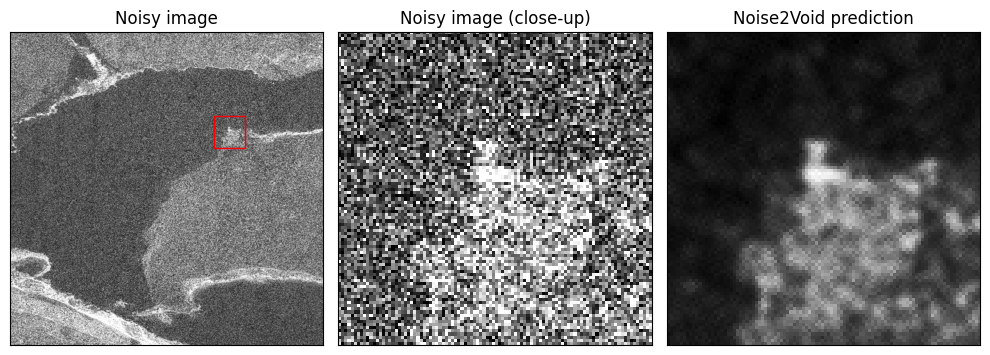

In [5]:
# Illustrate checkerboard artifact
# Show the full image and crops
x_start, x_end = 650, 750
y_start, y_end = 270, 370

fig, ax = plt.subplots(1, 3, figsize=(10, 15))
ax[0].imshow(train_image[:1000, :1000], cmap="gray")
ax[0].set_title("Noisy image")
rect = patches.Rectangle((650, 270), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(train_image[y_start:y_end, x_start:x_end], cmap="gray")
ax[1].set_title("Noisy image (close-up)")
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(pred_checker[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")
ax[2].set_title("Noise2Void prediction")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.tight_layout()
fig.savefig("n2v_prediction_checkerboard.png", bbox_inches='tight')


In [6]:
# N2V2 prediction
careamist2 = CAREamist(source="sem_n2v2.ckpt")
pred_n2v2 = careamist2.predict(source=train_image, tile_size=(256, 256))

No working directory provided. Using current working directory: /home/joran.deschamps/git/careamics/careamics-examples/algorithms/n2v2.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                             | 0/? [00:00<?, ?it/s]

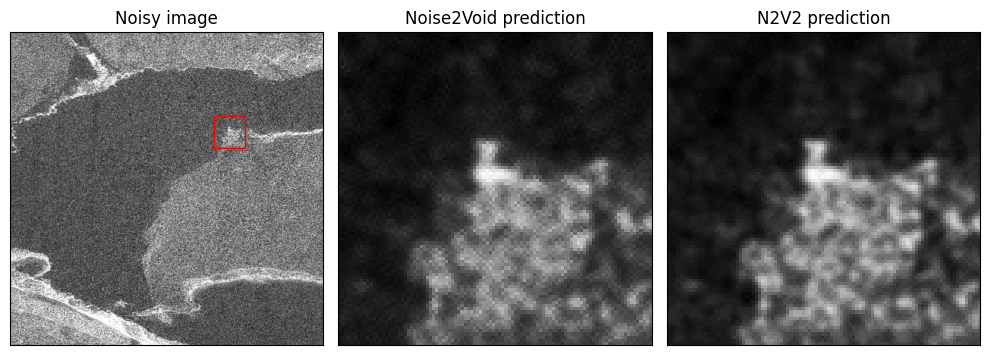

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(10, 15))
ax[0].imshow(train_image[:1000, :1000], cmap="gray")
ax[0].set_title("Noisy image")
rect = patches.Rectangle((650, 270), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(pred_checker[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")
ax[1].set_title("Noise2Void prediction")
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(pred_n2v2[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")
ax[2].set_title("N2V2 prediction")
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.tight_layout()
fig.savefig("n2v_vs_n2v2_checkerboard.png", bbox_inches='tight')